# Identifying the Risk of COVID-19 and North Atlantic Hurricanes 

**Authors**: Jocelyn Lutes, Quinton Lopez, Uriel Eckmann

## Problem Statement

## Executive Summary

## Table of Contents

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import timedelta

pd.set_option("display.max_columns", None)
RANDOM_STATE = 42

## Read-In Hurricane Data

### North Atlantic Hurricanes

In [2]:
df = pd.read_csv('../data/hurricanes_east_coast_landfall.csv')
df = df.drop(columns = ['usa_record', 'eye_diameter'])
df.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees)
0,1851175N26270,1851,5.0,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,HU,80.0,NaN,1.0,NaN,5.0,286.0
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0


In [3]:
geo_df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['longitude'], df['latitude']))

In [4]:
geo_df.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry
0,1851175N26270,1851,5.0,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,HU,80.0,NaN,1.0,NaN,5.0,286.0,POINT (-96.56670 28.13330)
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670)
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650)
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000)
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170)


### Visualize Current Points

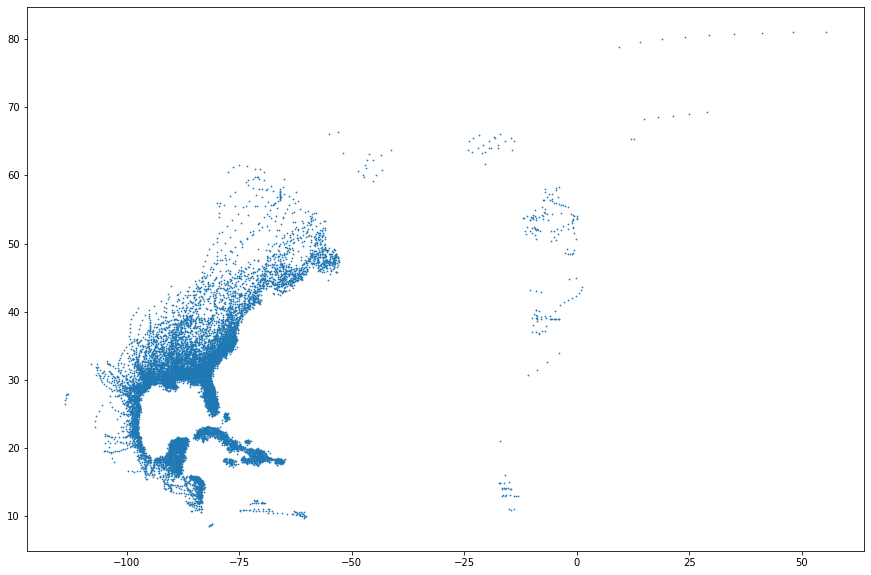

In [5]:
plt.figure(figsize= (15,10))
plt.scatter(x = df["longitude"],
           y = df["latitude"],
           s = 0.5);

### USA - States

In [6]:
usa_states = gpd.read_file('../maps/states_21basic/states.shp')
usa_states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


### USA - Counties

In [7]:
usa_counties = gpd.read_file('../maps/cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
usa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


## Identifying Hurricane Rows Within the USA

In [8]:
def usa_region_column(df1, df2, col1, new_column = None):
    # empty dictionary
    location_dict = {}
    # iterate through hurricane points
    for point_index, point in df1['geometry'].iteritems():
        # iterate through our location dataframe
        for index, location in df2['geometry'].iteritems():
            if point.within(location) == True:
                location_dict[point_index] = df2[col1][index]      
    return location_dict

### States

In [9]:
hurricane_states = usa_region_column(geo_df, usa_states, 'STATE_NAME')

In [10]:
indices_to_keep = list(hurricane_states.keys())

In [11]:
states_list = list(hurricane_states.values())

In [12]:
geo_df_usa = geo_df.loc[indices_to_keep, :]

In [13]:
geo_df_usa['state'] = states_list

In [14]:
geo_df_usa.shape

(7155, 24)

### County

In [15]:
hurricane_counties = usa_region_column(geo_df_usa, usa_counties, 'NAME')

In [16]:
indices_to_keep = list(hurricane_counties.keys())

In [17]:
county_list = list(hurricane_counties.values())

In [18]:
len(county_list)

7145

In [19]:
geo_df_usa = geo_df_usa.loc[indices_to_keep, :]

In [20]:
geo_df_usa['county'] = county_list

In [21]:
geo_df_usa.head()

,storm_id,year,number,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry,state,county
1,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,HU,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670),Texas,Calhoun
2,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,HU,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650),Texas,Refugio
3,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,TS,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000),Texas,Refugio
4,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,TS,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170),Texas,Bee
5,1851175N26270,1851,5.0,NOT_NAMED,1851-06-26 12:00:00,TS,28.4333,-98.1000,60.0,NaN,hurdat_atl,0,0.0,28.4000,-98.3000,TS,60.0,NaN,0.0,NaN,6.0,284.0,POINT (-98.10000 28.43330),Texas,Live Oak


In [176]:
geo_df_usa.isna().sum()

storm_id                       0
year                           0
number                         0
name                           0
iso_time                       0
nature                         0
latitude                       0
longitude                      0
wmo_wind(knots)             3801
wmo_pressure(mb)            5726
wmo_agency                  3800
dist2land(km)                  0
landfall(km)                   0
usa_lat                      519
usa_lon                      519
usa_status                   481
usa_wind                     541
usa_pres                    4356
storm_category                94
sea_height(ft)              6980
storm_speed(knots)             0
storm_direction(degrees)       0
geometry                       0
state                          0
county                         0
dtype: int64

### Visualize Remaining Points

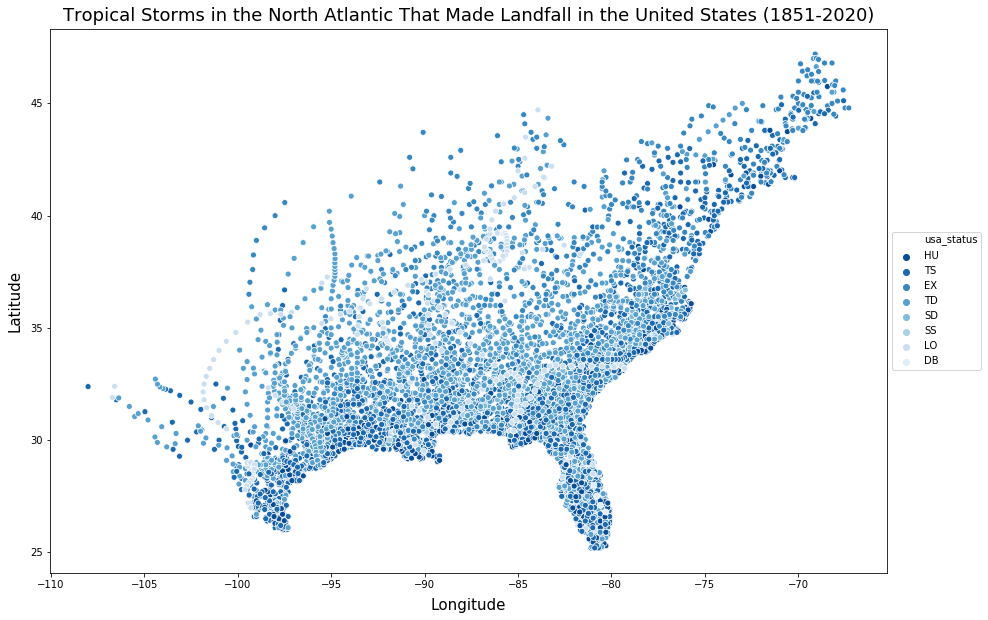

In [22]:
plt.figure(figsize= (15,10))
sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'usa_status', data = geo_df_usa, palette = 'Blues_r', legend = 'full')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Tropical Storms in the North Atlantic That Made Landfall in the United States (1851-2020)', fontdict = {'fontsize':18}, pad = 8)
plt.xlabel('Longitude', fontdict = {'fontsize':15}, labelpad = 8 )
plt.ylabel('Latitude', fontdict = {'fontsize':15}, labelpad = 8);

The above figure shows the areas of the United States that have a historical risk of North Atlantic tropical storms. Key: HU = hurricane...etc.

### Export to CSV

In [23]:
# geo_df_usa.to_csv('../data/geo_usa.csv')
# print('File has been exported.')

## Create Counts of Storm Category by County

### Functions

In [24]:
states_with_hurricanes_list = list(geo_df_usa['state'].unique())

In [25]:
# Get Count of Storms by Category for Counties in 1 State

def get_category_count(df, state, column, value):
    state_df = df[df['state'] == state].copy()
    state_df = state_df.reset_index()
    
    category_counter = {}
    
    for i in range(state_df.shape[0]):
        if state_df[column][i] == value:
            if state_df['county'][i] not in category_counter:
                category_counter[state_df['county'][i]] = 1
            else:
                category_counter[state_df['county'][i]] += 1
        else:
            if state_df['county'][i] not in category_counter:
                category_counter[state_df['county'][i]] = 0
            
    return category_counter

In [26]:
def get_dfs(state, category_dict):
    df = pd.DataFrame(category_dict[state].values(), index = category_dict[state].keys())
    df['state'] = state
    return df

### Storm Category

#### Category 1

In [27]:
# Category 1 Storms

category_1_dict = {}
category_1_df_list = []

for state in states_with_hurricanes_list:
    category_1_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 1.0)
    category_1_df_list.append(get_dfs(state, category_1_dict))
    
categories_df = pd.concat(category_1_df_list)
categories_df = categories_df.rename(columns = {0:'cat_1_count'})

In [28]:
categories_df = categories_df[['state', 'cat_1_count']]

#### Category 2

In [29]:
category_2_dict = {}
category_2_df_list = []

for state in states_with_hurricanes_list:
    category_2_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 2.0)
    category_2_df_list.append(get_dfs(state, category_2_dict))
    
category_2_df = pd.concat(category_2_df_list)
categories_df['cat_2_count'] = category_2_df[0]


#### Category 3

In [30]:
category_3_dict = {}
category_3_df_list = []

for state in states_with_hurricanes_list:
    category_3_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 3.0)
    category_3_df_list.append(get_dfs(state, category_3_dict))
    
category_3_df = pd.concat(category_3_df_list)
categories_df['cat_3_count'] = category_3_df[0]

#### Category 4

In [31]:
category_4_dict = {}
category_4_df_list = []

for state in states_with_hurricanes_list:
    category_4_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 4.0)
    category_4_df_list.append(get_dfs(state, category_4_dict))
    
category_4_df = pd.concat(category_4_df_list)
categories_df['cat_4_count'] = category_4_df[0]

#### Category 5

In [32]:
category_5_dict = {}
category_5_df_list = []

for state in states_with_hurricanes_list:
    category_5_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 5.0)
    category_5_df_list.append(get_dfs(state, category_5_dict))
    
category_5_df = pd.concat(category_5_df_list)
categories_df['cat_5_count'] = category_5_df[0]

### Storm Type

#### Hurricanes

In [33]:
hu_dict = {}
hu_df_list = []

for state in states_with_hurricanes_list:
    hu_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'HU')
    hu_df_list.append(get_dfs(state, hu_dict))
    
hu_df = pd.concat(hu_df_list)
categories_df['hurricane_count'] = hu_df[0]

#### Tropical Storms

In [34]:
ts_dict = {}
ts_df_list = []

for state in states_with_hurricanes_list:
    ts_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'TS')
    ts_df_list.append(get_dfs(state, ts_dict))
    
ts_df = pd.concat(ts_df_list)
categories_df['tropical_storm_count'] = ts_df[0]

#### Extratropical System

In [35]:
ex_dict = {}
ex_df_list = []

for state in states_with_hurricanes_list:
    ex_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'EX')
    ex_df_list.append(get_dfs(state, ex_dict))
    
ex_df = pd.concat(ex_df_list)
categories_df['extratropical_system_count'] = ex_df[0]

#### Tropical Depression

In [36]:
td_dict = {}
td_df_list = []

for state in states_with_hurricanes_list:
    td_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'TD')
    td_df_list.append(get_dfs(state, td_dict))
    
td_df = pd.concat(td_df_list)
categories_df['tropical_depression_count'] = td_df[0]

#### Low Count

In [37]:
lo_dict = {}
lo_df_list = []

for state in states_with_hurricanes_list:
    lo_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'LO')
    lo_df_list.append(get_dfs(state, lo_dict))
    
lo_df = pd.concat(lo_df_list)
categories_df['low_count'] = lo_df[0]

#### Subtropical Depression

In [38]:
sd_dict = {}
sd_df_list = []

for state in states_with_hurricanes_list:
    sd_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'SD')
    sd_df_list.append(get_dfs(state, sd_dict))
    
sd_df = pd.concat(sd_df_list)
categories_df['subtropical_depression_count'] = sd_df[0]

#### Subtropical Storm Count

In [39]:
ss_dict = {}
ss_df_list = []

for state in states_with_hurricanes_list:
    ss_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'SS')
    ss_df_list.append(get_dfs(state, ss_dict))
    
ss_df = pd.concat(ss_df_list)
categories_df['subtropical_storm_count'] = ss_df[0]

#### Dissipating Storms

In [40]:
ds_dict = {}
ds_df_list = []

for state in states_with_hurricanes_list:
    ds_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'DB')
    ds_df_list.append(get_dfs(state, ds_dict))
    
ds_df = pd.concat(ds_df_list)
categories_df['dissipating_storm_count'] = ds_df[0]

#### All Storm Types and Categories Combined

In [41]:
categories_df.shape

categories_df['county'] = categories_df.index

categories_df = categories_df.reset_index()

categories_df.head()

# Confirm that counties with same name have state preserved
categories_df[categories_df['county'] == 'Clark']

,index,state,cat_1_count,cat_2_count,cat_3_count,cat_4_count,cat_5_count,hurricane_count,tropical_storm_count,extratropical_system_count,tropical_depression_count,low_count,subtropical_depression_count,subtropical_storm_count,dissipating_storm_count,county
1074,Clark,Arkansas,0,0,0,0,0,0,0,0,4,0,0,0,0,Clark
1146,Clark,Kentucky,0,0,0,0,0,0,0,0,1,0,0,0,0,Clark
1250,Clark,Indiana,0,0,0,0,0,0,0,2,0,1,0,0,0,Clark


## Read-in COVID-19 Data

### Most Recent CSV from NY Times Github

In [169]:
#url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
covid_df = pd.read_csv('../data/covid_nyt_data.csv')
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Get Population Data for States Affected by Hurricanes

In [135]:
alabama = pd.read_csv('USA_counties_pop/cc-est2019-agesex-01.csv')
dc = pd.read_csv('USA_counties_pop/cc-est2019-agesex-11.csv')
nebraska = pd.read_csv('USA_counties_pop/cc-est2019-agesex-31.csv')
wisconsin = pd.read_csv('USA_counties_pop/cc-est2019-agesex-55.csv')
iowa = pd.read_csv('USA_counties_pop/cc-est2019-agesex-19.csv')
rhode_island = pd.read_csv('USA_counties_pop/cc-est2019-agesex-44.csv')
vermont = pd.read_csv('USA_counties_pop/cc-est2019-agesex-50.csv')
delaware = pd.read_csv('USA_counties_pop/cc-est2019-agesex-10.csv')
connecticut = pd.read_csv('USA_counties_pop/cc-est2019-agesex-09.csv')
kansas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-20.csv')
massachusetts = pd.read_csv('USA_counties_pop/cc-est2019-agesex-25.csv')
new_hampshire = pd.read_csv('USA_counties_pop/cc-est2019-agesex-33.csv')
new_jersey = pd.read_csv('USA_counties_pop/cc-est2019-agesex-34.csv')
michigan = pd.read_csv('USA_counties_pop/cc-est2019-agesex-26.csv')
west_virginia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-54.csv')
maryland = pd.read_csv('USA_counties_pop/cc-est2019-agesex-24.csv')
ohio = pd.read_csv('USA_counties_pop/cc-est2019-agesex-39.csv')
illinois = pd.read_csv('USA_counties_pop/cc-est2019-agesex-17.csv')
oklahoma = pd.read_csv('USA_counties_pop/cc-est2019-agesex-40.csv')
indiana = pd.read_csv('USA_counties_pop/cc-est2019-agesex-18.csv')
missouri = pd.read_csv('USA_counties_pop/cc-est2019-agesex-29.csv')
maine = pd.read_csv('USA_counties_pop/cc-est2019-agesex-23.csv')
new_york = pd.read_csv('USA_counties_pop/cc-est2019-agesex-36.csv')
pennsylvania = pd.read_csv('USA_counties_pop/cc-est2019-agesex-42.csv')
kentucky = pd.read_csv('USA_counties_pop/cc-est2019-agesex-21.csv')
tennessee = pd.read_csv('USA_counties_pop/cc-est2019-agesex-47.csv')
arkansas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-05.csv')
virginia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-51.csv')
south_carolina = pd.read_csv('USA_counties_pop/cc-est2019-agesex-45.csv')
mississippi = pd.read_csv('USA_counties_pop/cc-est2019-agesex-28.csv')
north_carolina = pd.read_csv('USA_counties_pop/cc-est2019-agesex-37.csv')
louisiana = pd.read_csv('USA_counties_pop/cc-est2019-agesex-22.csv')
georgia = pd.read_csv('USA_counties_pop/cc-est2019-agesex-13.csv')
texas = pd.read_csv('USA_counties_pop/cc-est2019-agesex-48.csv')
florida = pd.read_csv('USA_counties_pop/cc-est2019-agesex-12.csv')
new_mexico = pd.read_csv('USA_counties_pop/cc-est2019-agesex-35.csv', encoding='ISO-8859-1')

In [136]:
county_pop = pd.concat([alabama, dc, nebraska, wisconsin, iowa, rhode_island, vermont, delaware, connecticut, kansas, massachusetts, new_hampshire, new_jersey, michigan, west_virginia, maryland, ohio, illinois, oklahoma, indiana, missouri, maine, new_york, pennsylvania, kentucky, tennessee, arkansas, south_carolina, mississippi, north_carolina, louisiana, georgia, texas, florida, new_mexico, virginia])

In [137]:
county_pop = county_pop[county_pop['YEAR'] == 12][['STNAME', 'CTYNAME', 'POPESTIMATE']]

In [138]:
county_pop.head()

,STNAME,CTYNAME,POPESTIMATE
11,Alabama,Autauga County,55869
23,Alabama,Baldwin County,223234
35,Alabama,Barbour County,24686
47,Alabama,Bibb County,22394
59,Alabama,Blount County,57826


In [139]:
county_pop['CTYNAME'] = county_pop['CTYNAME'].map(lambda x: x.replace('County', '').strip(' '))
county_pop['CTYNAME'] = county_pop['CTYNAME'].map(lambda x: x.replace('Parish', '').strip(' '))

In [140]:
covid_df = pd.merge(left = covid_df, right = county_pop, how = 'left', left_on = ['state', 'county'], right_on = ['STNAME', 'CTYNAME'])

In [141]:
covid_df.head()

,date,county,state,fips,cases,deaths,STNAME,CTYNAME,POPESTIMATE
0,2020-01-21,Snohomish,Washington,53061.0,1,0,NaN,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,NaN,NaN,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0,NaN,NaN,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0,Illinois,Cook,5150233.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,NaN,NaN,NaN


In [142]:
covid_df = covid_df.drop(columns = ['STNAME', 'CTYNAME'])

In [143]:
covid_df = covid_df.rename(columns = {'POPESTIMATE': '2019_population'})

In [144]:
covid_df.head()

,date,county,state,fips,cases,deaths,2019_population
0,2020-01-21,Snohomish,Washington,53061.0,1,0,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0,5150233.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,NaN


In [145]:
covid_df['cases_per_100000'] = round((covid_df['cases']/covid_df['2019_population']) * 100000, 1)

In [146]:
covid_df.head()

,date,county,state,fips,cases,deaths,2019_population,cases_per_100000
0,2020-01-21,Snohomish,Washington,53061.0,1,0,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,NaN,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0,NaN,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0,5150233.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0,NaN,NaN


### Data for Current Date

In [147]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_current = covid_df[covid_df['date'] == covid_df['date'].max()].copy()

In [148]:
covid_current.head()

,date,county,state,fips,cases,deaths,2019_population,cases_per_100000
421390,2020-08-11,Autauga,Alabama,1001.0,1215,23,55869.0,2174.7
421391,2020-08-11,Baldwin,Alabama,1003.0,3736,32,223234.0,1673.6
421392,2020-08-11,Barbour,Alabama,1005.0,643,6,24686.0,2604.7
421393,2020-08-11,Bibb,Alabama,1007.0,455,6,22394.0,2031.8
421394,2020-08-11,Blount,Alabama,1009.0,958,5,57826.0,1656.7


### Data for Last Week

In [149]:
covid_one_weeks_ago = covid_df[covid_df['date'] == (covid_df['date'].max() - timedelta(7))]
covid_one_weeks_ago = covid_one_weeks_ago.rename(columns = {'cases':'previous_cases', 'deaths': 'previous_deaths', 'cases_per_100000': 'previous_cases_per_100000'})
covid_one_weeks_ago = covid_one_weeks_ago[['date', 'county', 'state', 'previous_cases','previous_deaths', 'previous_cases_per_100000']]

### Calculate Change in Cases Over Last Week

In [150]:
covid_current = pd.merge(left = covid_current, right = covid_one_weeks_ago, how = 'left', on = ['state', 'county'])

In [151]:
covid_current.head()

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_deaths,previous_cases_per_100000
0,2020-08-11,Autauga,Alabama,1001.0,1215,23,55869.0,2174.7,2020-08-04,1073.0,21.0,1920.6
1,2020-08-11,Baldwin,Alabama,1003.0,3736,32,223234.0,1673.6,2020-08-04,3320.0,24.0,1487.2
2,2020-08-11,Barbour,Alabama,1005.0,643,6,24686.0,2604.7,2020-08-04,614.0,5.0,2487.2
3,2020-08-11,Bibb,Alabama,1007.0,455,6,22394.0,2031.8,2020-08-04,389.0,3.0,1737.1
4,2020-08-11,Blount,Alabama,1009.0,958,5,57826.0,1656.7,2020-08-04,836.0,3.0,1445.7


In [152]:
covid_current['change_in_cases'] = covid_current['cases'] - covid_current['previous_cases']

In [153]:
covid_current['change_in_case_ratio'] = covid_current['cases_per_100000'] - covid_current['previous_cases_per_100000']

In [154]:
covid_current.head()

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_deaths,previous_cases_per_100000,change_in_cases,change_in_case_ratio
0,2020-08-11,Autauga,Alabama,1001.0,1215,23,55869.0,2174.7,2020-08-04,1073.0,21.0,1920.6,142.0,254.1
1,2020-08-11,Baldwin,Alabama,1003.0,3736,32,223234.0,1673.6,2020-08-04,3320.0,24.0,1487.2,416.0,186.4
2,2020-08-11,Barbour,Alabama,1005.0,643,6,24686.0,2604.7,2020-08-04,614.0,5.0,2487.2,29.0,117.5
3,2020-08-11,Bibb,Alabama,1007.0,455,6,22394.0,2031.8,2020-08-04,389.0,3.0,1737.1,66.0,294.7
4,2020-08-11,Blount,Alabama,1009.0,958,5,57826.0,1656.7,2020-08-04,836.0,3.0,1445.7,122.0,211.0


In [155]:
covid_current.sort_values('change_in_cases', ascending = False);

In [156]:
covid_current.to_csv('../data/covid_current.csv', index = False)

### Filter DF to Only Include States with Hurricanes

In [157]:
def state_mask(state, df = covid_current):
    return df['state'] == state

In [158]:
mask1 = state_mask('Alabama')
mask2 = state_mask('Florida')
mask3 = state_mask('Georgia')
mask4 = state_mask('Louisiana')
mask5 = state_mask('Mississippi')
mask6 = state_mask('Tennessee')
mask7 = state_mask('North Carolina')
mask8 = state_mask('South Carolina')
mask9 = state_mask('Texas')
mask10 = state_mask('Connecticut')
mask11 = state_mask('District of Columbia')
mask12 = state_mask('Delaware')
mask13 = state_mask('Massachusetts')
mask14 = state_mask('Maryland')
mask15 = state_mask('Maine')
mask16 = state_mask('New Hampshire')
mask17 = state_mask('New Jersey')
mask18 = state_mask('New York')
mask19 = state_mask('Ohio')
mask20 = state_mask('Pennsylvania')
mask21 = state_mask('Rhode Island')
mask22 = state_mask('Virginia')
mask23 = state_mask('Vermont')
mask24 = state_mask('West Virginia')
mask25 = state_mask('Illinois')
mask26 = state_mask('Indiana')
mask27 = state_mask('Kentucky')
mask28 = state_mask('Missouri')
mask29 = state_mask('Nebraska')
mask30 = state_mask('New Mexico')
mask31 = state_mask('Wisconsin')
mask32 = state_mask('Iowa')
mask33 = state_mask('Kansas')
mask34 = state_mask('Oklahoma')
mask35 = state_mask('Michigan')
mask36 = state_mask('Arkansas')

In [159]:
covid_hurricane_states = covid_current[mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8| mask9| mask10| mask11| mask12|mask13| mask14| mask15| mask16|mask17|mask18|mask19|mask20|mask21|mask22|mask23|mask24|mask25|mask26|mask27|mask28|mask29|mask30|mask31|mask32|mask33|mask34|mask35|mask36]

In [160]:
covid_hurricane_states.to_csv('../data/covid_hurricane_states.csv', index = False)

## Merge Hurricane and Covid Data

In [161]:
categories_df.head(2)

,index,state,cat_1_count,cat_2_count,cat_3_count,cat_4_count,cat_5_count,hurricane_count,tropical_storm_count,extratropical_system_count,tropical_depression_count,low_count,subtropical_depression_count,subtropical_storm_count,dissipating_storm_count,county
0,Calhoun,Texas,2,3,1,0,0,6,2,0,5,0,0,0,0,Calhoun
1,Refugio,Texas,3,1,2,0,0,6,5,0,1,0,0,0,0,Refugio


In [162]:
covid_hurricane_states.head(2)

,date_x,county,state,fips,cases,deaths,2019_population,cases_per_100000,date_y,previous_cases,previous_deaths,previous_cases_per_100000,change_in_cases,change_in_case_ratio
0,2020-08-11,Autauga,Alabama,1001.0,1215,23,55869.0,2174.7,2020-08-04,1073.0,21.0,1920.6,142.0,254.1
1,2020-08-11,Baldwin,Alabama,1003.0,3736,32,223234.0,1673.6,2020-08-04,3320.0,24.0,1487.2,416.0,186.4


In [163]:
df = pd.merge(left = categories_df, right = covid_hurricane_states[['state', 'county', 'cases', 'deaths', 'previous_cases', 'previous_deaths','2019_population', 'change_in_case_ratio' ]], how = 'left', on = ['state', 'county'])

In [164]:
location_info = ['state', 'county']
hurricane_features = ['cat_1_count', 'cat_2_count', 'cat_3_count', 'cat_4_count', 'cat_5_count', 'hurricane_count', 'tropical_storm_count', 'extratropical_system_count', 'tropical_depression_count', 'low_count', 'subtropical_depression_count', 'dissipating_storm_count']
covid_features = ['cases', 'deaths', 'previous_cases', 'previous_deaths','2019_population','change_in_case_ratio']

features_to_keep = location_info + hurricane_features + covid_features

covid_and_hurricanes = df[features_to_keep]

In [165]:
covid_and_hurricanes.head()

,state,county,cat_1_count,cat_2_count,cat_3_count,cat_4_count,cat_5_count,hurricane_count,tropical_storm_count,extratropical_system_count,tropical_depression_count,low_count,subtropical_depression_count,dissipating_storm_count,cases,deaths,previous_cases,previous_deaths,2019_population,change_in_case_ratio
0,Texas,Calhoun,2,3,1,0,0,6,2,0,5,0,0,0,546.0,5.0,493.0,4.0,21290.0,249.0
1,Texas,Refugio,3,1,2,0,0,6,5,0,1,0,0,0,234.0,4.0,214.0,0.0,6948.0,287.9
2,Texas,Bee,1,0,0,0,0,1,8,0,2,0,0,0,1246.0,11.0,669.0,9.0,32565.0,1771.8
3,Texas,Live Oak,0,0,0,0,0,0,4,0,3,0,0,0,230.0,4.0,207.0,2.0,12207.0,188.5
4,Texas,McMullen,0,0,0,0,0,1,7,0,7,0,0,0,9.0,0.0,8.0,0.0,743.0,134.6


In [166]:
covid_and_hurricanes.isna().sum()

state                            0
county                           0
cat_1_count                      0
cat_2_count                      0
cat_3_count                      0
cat_4_count                      0
cat_5_count                      0
hurricane_count                  0
tropical_storm_count             0
extratropical_system_count       0
tropical_depression_count        0
low_count                        0
subtropical_depression_count     0
dissipating_storm_count          0
cases                           26
deaths                          26
previous_cases                  26
previous_deaths                 26
2019_population                 26
change_in_case_ratio            26
dtype: int64

In [167]:
# Commenting Code Out to Not re-save the file
covid_and_hurricanes.to_csv('../data/covid_and_hurricanes.csv', index = False)

In [ ]:
geo_df_usa.groupby(
    ['usa_status', 'county']
).agg(
    {
        'total': "count",
        
        
    })